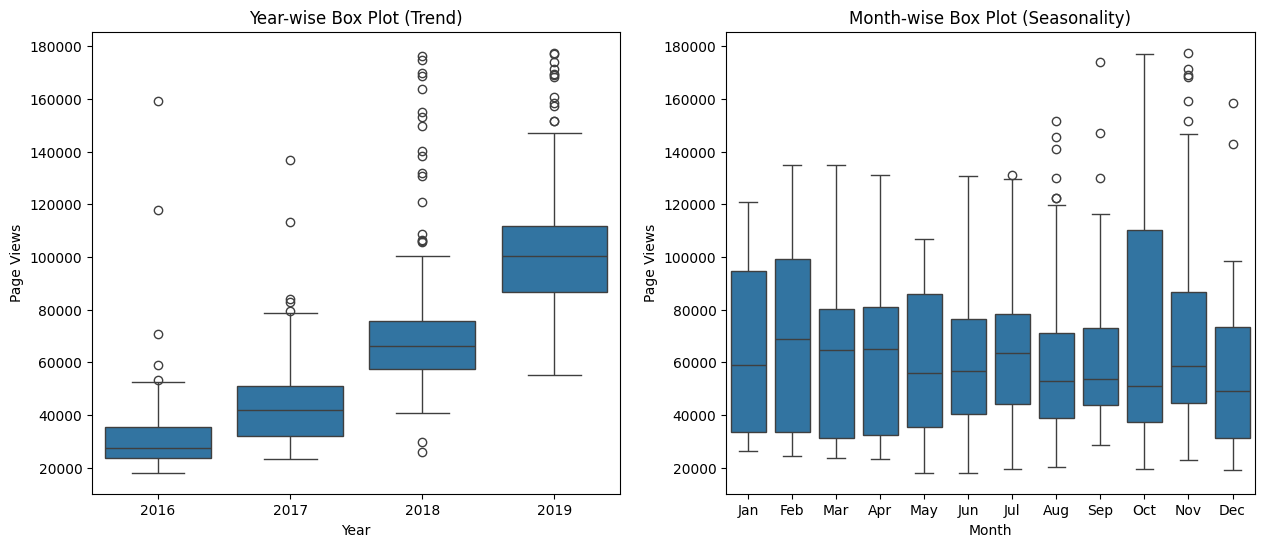

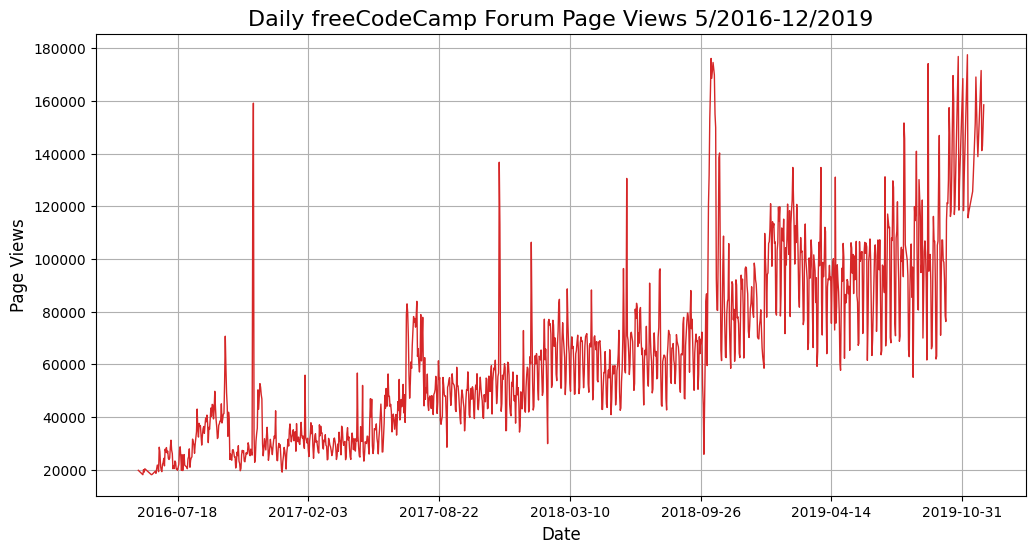

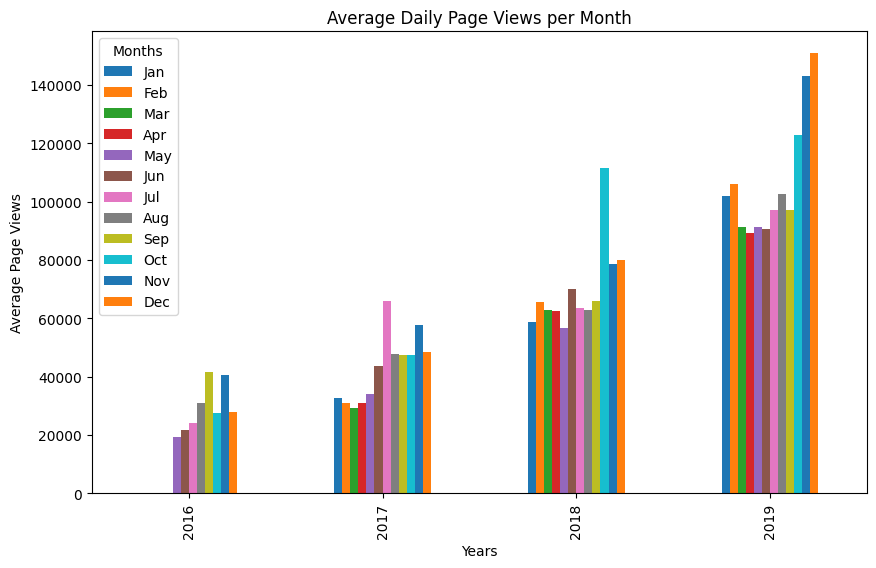

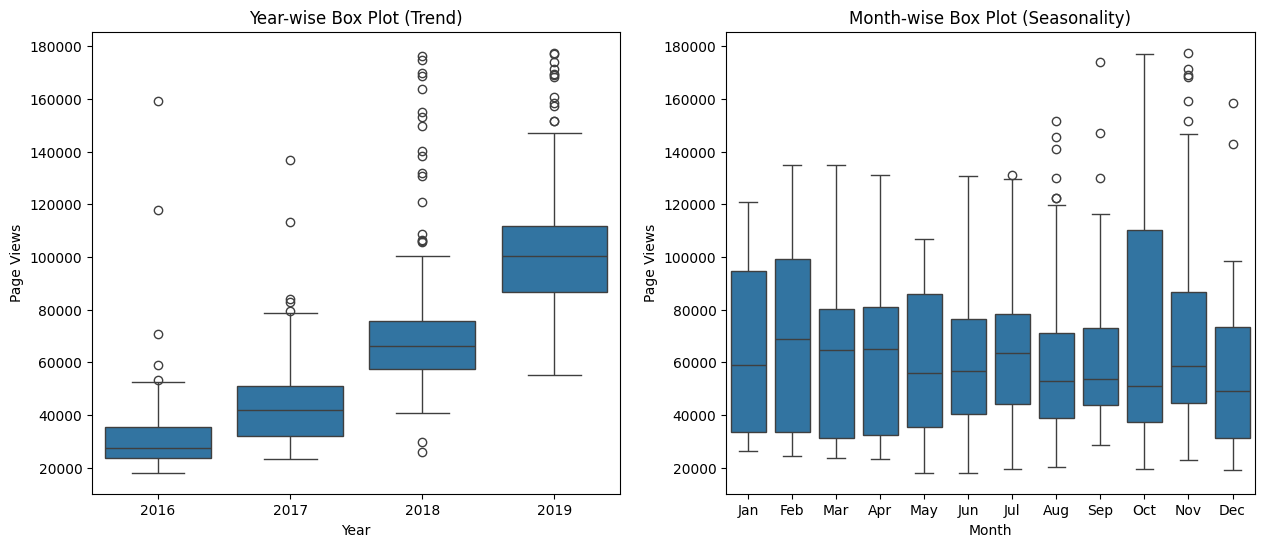

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(df.index, df['value'], color='tab:red', linewidth=1)

    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Page Views', fontsize=12)

    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid(True)

    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    fig = df_bar.plot(kind='bar', figsize=(10, 6), legend=True).figure
    plt.title('Average Daily Page Views per Month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')

    plt.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')  

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    fig.savefig('box_plot.png')
    return fig